In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df=df.drop("Postal Code",axis=1)

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df["Country"].unique()

array(['United States'], dtype=object)

In [8]:
del df["Country"]

In [9]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

<Axes: xlabel='Region', ylabel='count'>

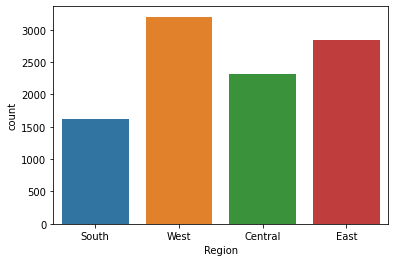

In [11]:
sns.countplot(x='Region',data=df)

<Axes: xlabel='Region', ylabel='Profit'>

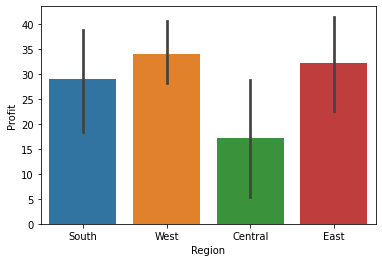

In [12]:
sns.barplot(x='Region', y='Profit', data=df)

In [13]:
profits_by_region = df.groupby('Region')['Profit'].mean()

In [14]:
profits_by_region

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

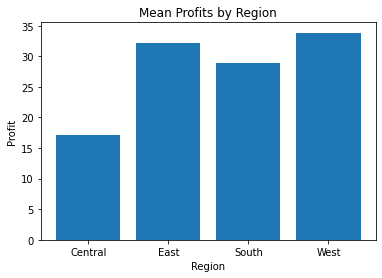

In [15]:
# Create a bar chart of the mean profits by region
plt.bar(profits_by_region.index, profits_by_region.values)
plt.title('Mean Profits by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

In [16]:
total_profits_by_region = df.groupby('Region')['Profit'].sum()

In [17]:
total_profits_by_region

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

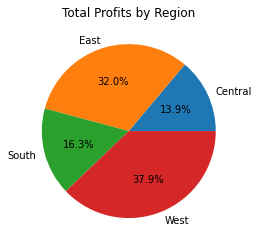

In [18]:
plt.pie(total_profits_by_region.values, labels=total_profits_by_region.index, autopct='%1.1f%%')
plt.title('Total Profits by Region')
plt.show()

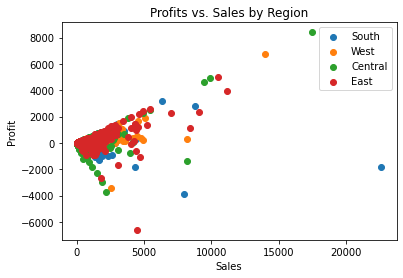

In [19]:
# Create a scatter plot of profits vs. sales for each region
for region in df['Region'].unique():
    region_data = df[df['Region']==region]
    plt.scatter(region_data['Sales'], region_data['Profit'], label=region)
plt.title('Profits vs. Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

### In our above Analysis We can see that region West and East average profit is better then south and central So Now we cheak the south and central region states where which state get less profitable as compared to other same as west and east

In [20]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Profits by State in South and Central Regions

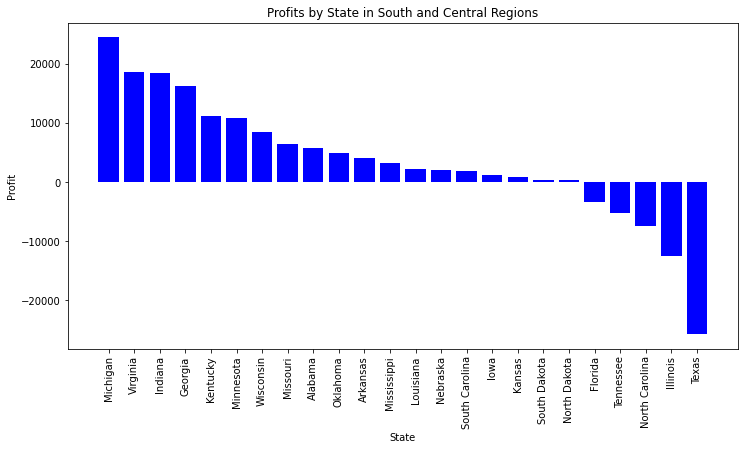

In [38]:
profits_by_state = df[df['Region'].isin(['South', 'Central'])].groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sort the data by profit in descending order
profits_by_state = profits_by_state.sort_values(by='Profit', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(profits_by_state['State'], profits_by_state['Profit'], color='blue')
ax.set_xlabel('State')
ax.set_ylabel('Profit')
ax.set_title('Profits by State in South and Central Regions')
plt.xticks(rotation=90)
plt.show()

### Profits by State in west and east Regions

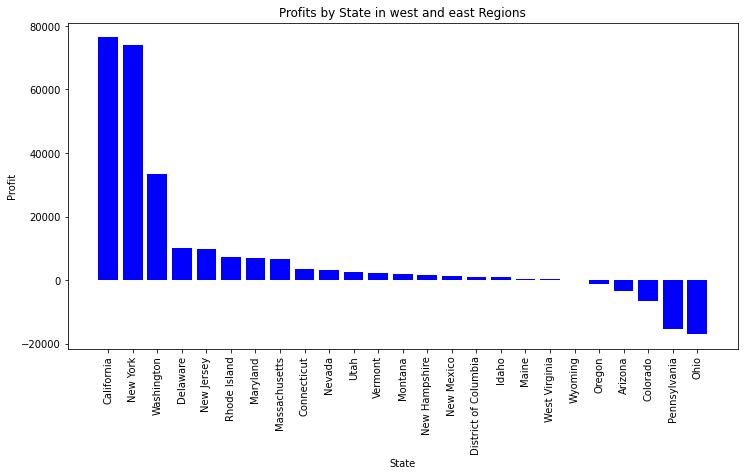

In [44]:
profits_by_state = df[df['Region'].isin(['West', 'East'])].groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sort the data by profit in descending order
profits_by_state = profits_by_state.sort_values(by='Profit', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(profits_by_state['State'], profits_by_state['Profit'], color='blue')
ax.set_xlabel('State')
ax.set_ylabel('Profit')
ax.set_title('Profits by State in west and east Regions')
plt.xticks(rotation=90)
plt.show()

### States in South and Central Regions with Profit less than 1.728750

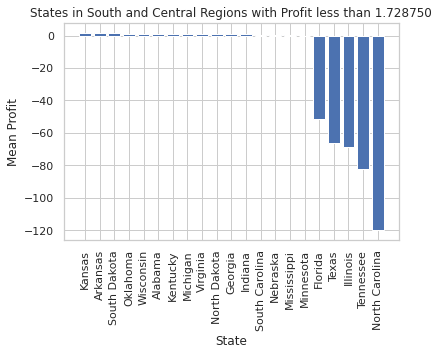

In [90]:
filtered_data = df[(df['Region'].isin(['South', 'Central'])) & (df['Profit'] < 1.728750)]

# Group the filtered data by State and calculate the mean profit
grouped_data = filtered_data.groupby('State')['Profit'].mean()

# Sort the data in descending order of profit
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar plot of the sorted data
plt.bar(sorted_data.index, sorted_data.values)
plt.title('States in South and Central Regions with Profit less than 1.728750')
plt.xlabel('State')
plt.ylabel('Mean Profit')
plt.xticks(rotation=90)
plt.show()

### States in South and Central Regions with Profit greater than 1.728750

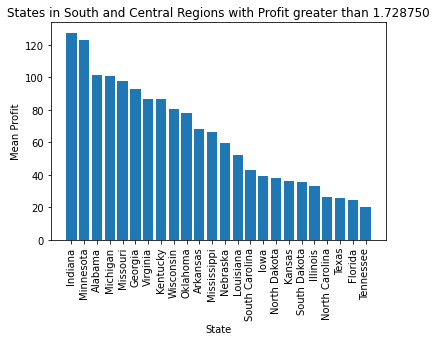

In [47]:
filtered_data = df[(df['Region'].isin(['South', 'Central'])) & (df['Profit'] > 1.728750)]

# Group the filtered data by State and calculate the mean profit
grouped_data = filtered_data.groupby('State')['Profit'].mean()

# Sort the data in descending order of profit
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar plot of the sorted data
plt.bar(sorted_data.index, sorted_data.values)
plt.title('States in South and Central Regions with Profit greater than 1.728750')
plt.xlabel('State')
plt.ylabel('Mean Profit')
plt.xticks(rotation=90)
plt.show()

### States in West and east Regions with Profit less than 1.728750

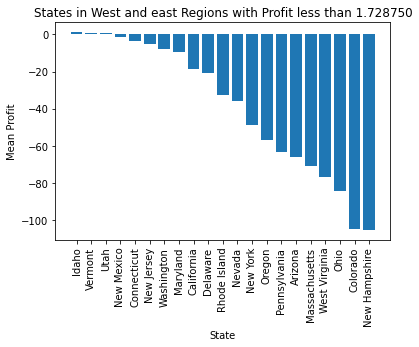

In [51]:
filtered_data = df[(df['Region'].isin(['East', 'West'])) & (df['Profit'] < 1.728750)]

# Group the filtered data by State and calculate the mean profit
grouped_data = filtered_data.groupby('State')['Profit'].mean()

# Sort the data in descending order of profit
sorted_data = grouped_data.sort_values(ascending=False)

# Create a bar plot of the sorted data
plt.bar(sorted_data.index, sorted_data.values)
plt.title('States in West and east Regions with Profit less than 1.728750')
plt.xlabel('State')
plt.ylabel('Mean Profit')
plt.xticks(rotation=90)
plt.show()

### States in East and West  Central Regions with Profit greater than 1.728750

In [82]:
filtered_data = df[(df['Region'].isin(['East', 'West'])) & (df['Profit'] > 1.728750)]

# Group the filtered data by State and calculate the mean profit
grouped_data = filtered_data.groupby('State')['Profit'].mean()
grouped_data
# # Sort the data in descending order of profit
# sorted_data = grouped_data.sort_values(ascending=False)

# # # Create a bar plot of the sorted data
# plt.bar(sorted_data.index, sorted_data.values)
# plt.title('States in East and West  Central Regions with Profit greater than 1.728750')
# plt.xlabel('State')
# plt.ylabel('Mean Profit')
# plt.xticks(rotation=90)
# plt.show()

State
Arizona                  26.139154
California               44.358709
Colorado                 24.303280
Connecticut              45.843356
Delaware                109.360790
District of Columbia    105.958930
Idaho                    41.280400
Maine                    56.810775
Maryland                 72.423063
Massachusetts            57.874621
Montana                 122.221900
Nevada                   95.130836
New Hampshire            69.685354
New Jersey               81.150370
New Mexico               34.157053
New York                 77.013269
Ohio                     22.399165
Oregon                   23.213664
Pennsylvania             24.239034
Rhode Island            153.327108
Utah                     49.895182
Vermont                 224.401950
Washington               73.410846
West Virginia            87.625067
Wyoming                 100.196000
Name: Profit, dtype: float64

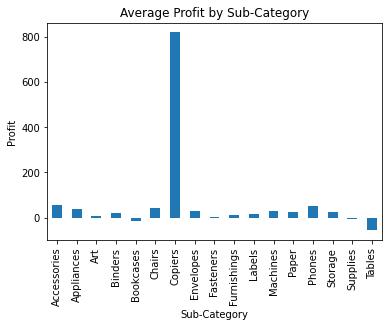

In [75]:
state_profits = df.groupby('State')['Profit'].sum()
state_profits
df['State'].unique()
# filter the results to show only the states with profits less than 1.728750
# less_profit_states = state_profits[state_profits['Profit'] < 1.728750]['State']

# print("States with profits less than 1.728750:")
# less_profit_states


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [77]:
sum=df['State'].unique()
sum.sum()

'KentuckyCaliforniaFloridaNorth CarolinaWashingtonTexasWisconsinUtahNebraskaPennsylvaniaIllinoisMinnesotaMichiganDelawareIndianaNew YorkArizonaVirginiaTennesseeAlabamaSouth CarolinaOregonColoradoIowaOhioMissouriOklahomaNew MexicoLouisianaConnecticutNew JerseyMassachusettsGeorgiaNevadaRhode IslandMississippiArkansasMontanaNew HampshireMarylandDistrict of ColumbiaKansasVermontMaineSouth DakotaIdahoNorth DakotaWyomingWest Virginia'

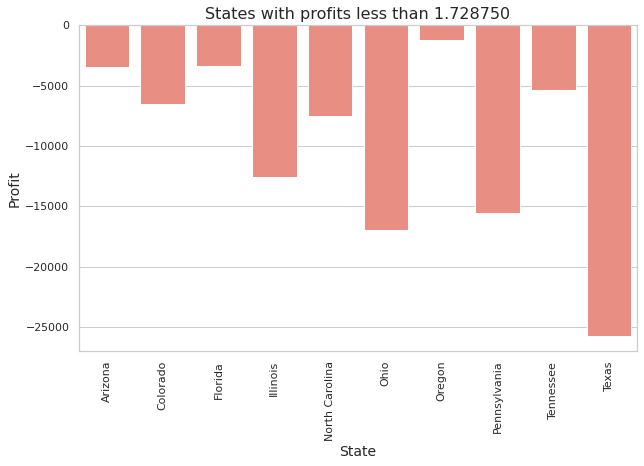

In [59]:
state_profits = df.groupby('State')['Profit'].sum().reset_index()

# filter the results to show only the states with profits less than 1.728750
less_profit_states = state_profits[state_profits['Profit'] < 1.728750]

# create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Profit', data=less_profit_states, color='salmon')
plt.title('States with profits less than 1.728750', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=90)
plt.show()

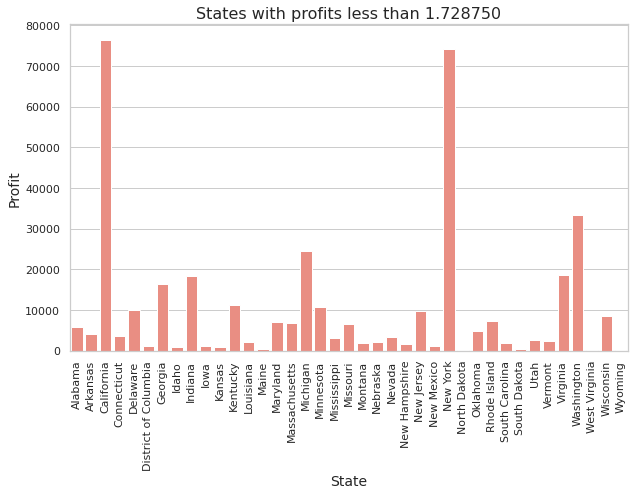

In [76]:
state_profits = df.groupby('State')['Profit'].sum().reset_index()

# filter the results to show only the states with profits less than 1.728750
less_profit_states = state_profits[state_profits['Profit'] > 1.728750]

# create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Profit', data=less_profit_states, color='salmon')
plt.title('States with profits less than 1.728750', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=90)
plt.show()